# Exploritory Data Analysis

In this notebooke we discover that :
1. Data before 7PM appears to be heavily influenced by commuter traffic and should be excluded in analysis of night life.
2. The data does not have a seasonal trend.

## The Data

This data is based on the train turnstile "validation" data from 2013 to June 2016 provided by Transport for NSW. It has transformed so there is an a single  observation for each Station, Date and Hour for the Exit and Entry figure. 

It includes:
* Station: The train station
* Hours:   5pm - 2am
* Date:    The date of the observation such that trips between 5pm and 2am the next day are the same date.
* Night:   THe name of the day for Date, e.g., "Friday".
* Exit:    The number of people exiting during the hour
* Entry:   The number of people entering during the hour

In [1]:
import numpy as np
import pandas as pd
from datetime import timedelta, datetime

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 2)

import seaborn as sns
sns.set(font_scale=0.8)

import outlier
from utilities import *

In [2]:
df_hourly = pd.read_pickle("TrainValidationData/df_hourly.pkl")
df_hourly['Year']    = df_hourly.index.year

df_daily = pd.read_pickle("TrainValidationData/df_daily.pkl")

stations= ['Kings Cross Station', 'Newtown Station', 'Parramatta Station']

# Visualisation

The following trellis plot has Nights from left to right and Stations from top to bottom. Each plot shows the average Exit volumes by hour.

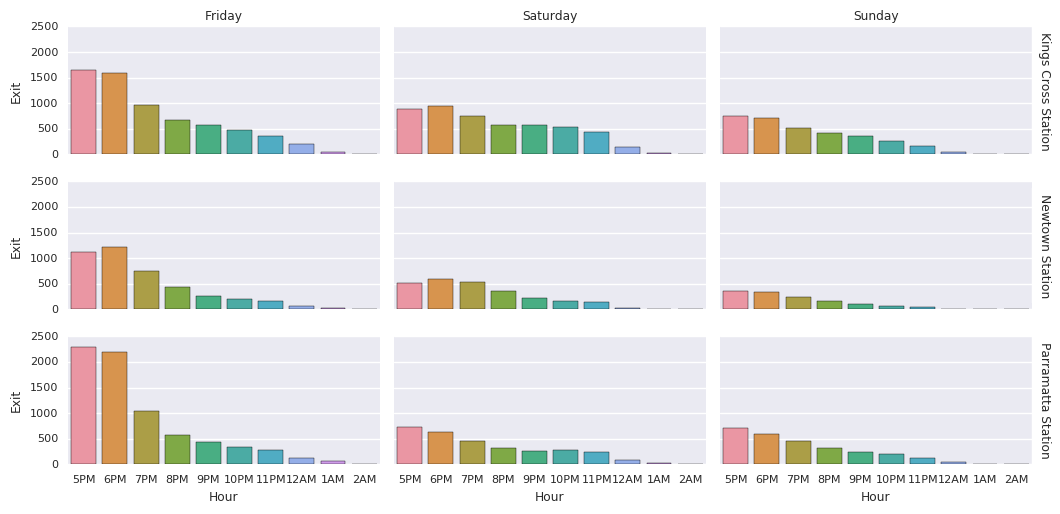

In [3]:
g=sns.factorplot(data=df_hourly, x='Hour', y='Exit', kind="bar", 
               row="Station", row_order=stations, col = 'Night',
               size=1.75, aspect=2, ci = None, margin_titles = True)

set_titles(g)

The chart above shows the 2013-16 average hourly Exit volumes, broken down by Night by Station. We see:
- The hourly volumes generally decline over Hours as might be reasonably expected.
- On Friday night the 5pm and 6pm exit traffic is much higher than on Saturday or Sunday, especially in  Parramatta. This is likely to be commuters heading home. In subsequet analysis we will only consider data from 7pm onwards.

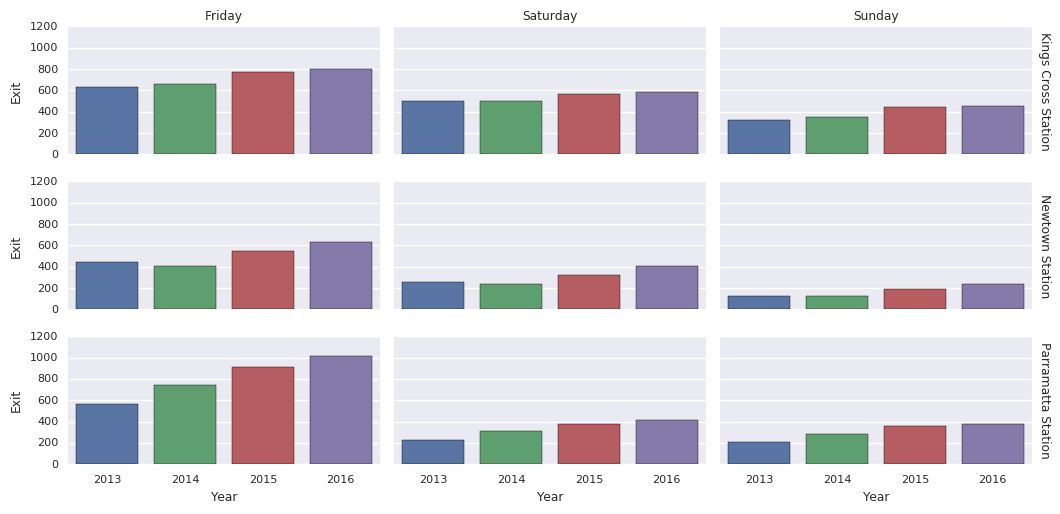

In [4]:
g = sns.factorplot(data=df_hourly, x='Year', y='Exit', kind="bar", 
               row="Station", row_order=stations, col = 'Night', 
               size=1.75, aspect=2, ci = None, margin_titles = True)

set_titles(g);

What is most noticable, is the  in Kings Cross Exit volumes increased between 2013 and 2016, indicating that the lockout laws did not impact train usage. This needs to be looked at more closely

## Autocorrelation

Autocorrolation plots of the 7PM and Daily Exit data for Kings Cross on Saturday Night does not show any seasonal effects and the short term movement around the trend is essentially random.

Since the time series has a linear trend it is necessary to remove this before applying the autocorrelation.

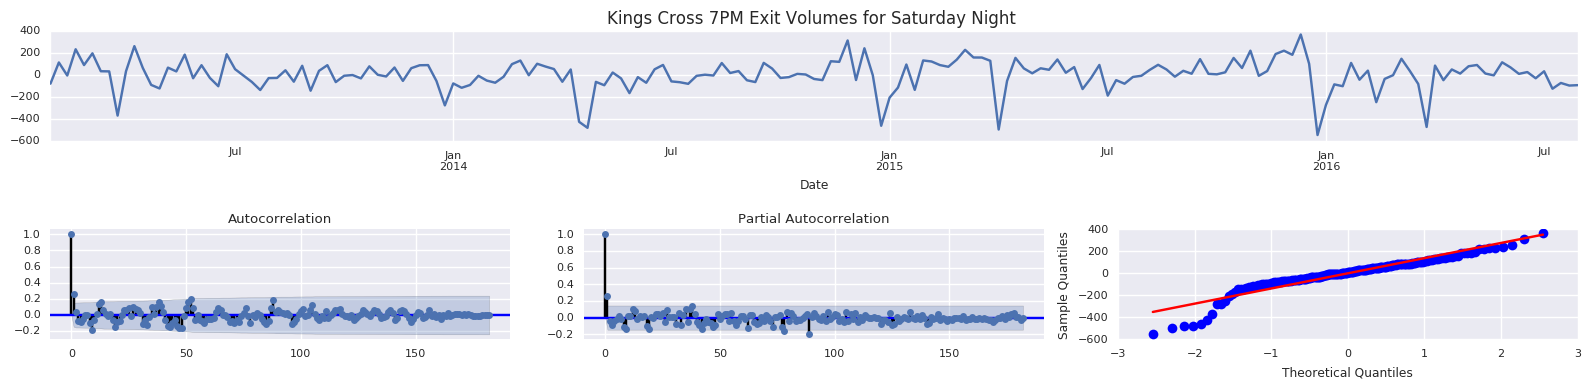

In [21]:
ts = (df_hourly.query('Station == "Kings Cross Station" and Night == "Friday" and Hour == "7PM"').
          groupby(level='Date')['Exit', 'Entry'].sum())

plt.figure(figsize=(16,4))
plot_autocorrelation(outlier.residue(ts.Exit), "Kings Cross 7PM Exit Volumes for Saturday Night ")

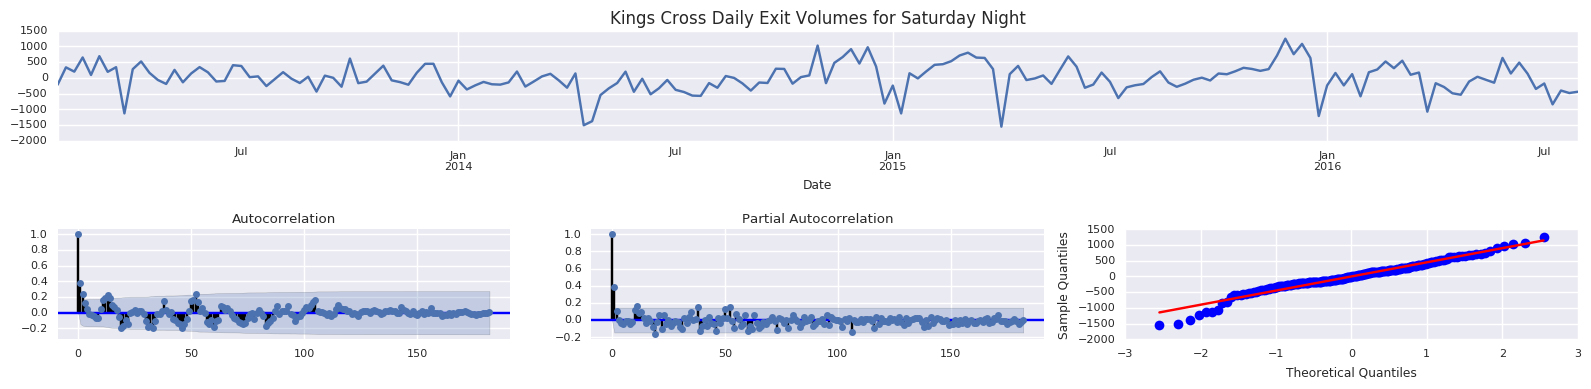

In [22]:
ts = (df_daily.query('Station == "Kings Cross Station" and Night == "Friday"').
          groupby(level='Date')['Exit', 'Entry'].sum())

plt.figure(figsize=(16,4))
plot_autocorrelation(outlier.residue(ts.Exit), "Kings Cross Daily Exit Volumes for Saturday Night")